###Blobs. A project of Urban CCD in Chicago.
#Tutorial 1.0 - Using Static Data

## Data Prep and Set-Up

You should have already cloned the *blobs* repo from GitHub, and saved it accordingly. The first steps import the required libraries, assign and initilize the required data and spatial files. Your data will be connected to spatial files, connecting 311 call data to census tracts in this case.

In [1]:
cd ..


/Users/Makosak/code/blobsA


In [2]:
# Import required libraries
import blobs
import numpy as np
import pandas as pd
import pysal as ps
import random as rdm
from pysal.contrib.viz import mapping as maps
%matplotlib inline
from pylab import *

In [3]:
# Open census tract shapefile and database.
shp_link = 'tracts/CensusTractsTIGER2010.shp'
dbf = ps.open('tracts/CensusTractsTIGER2010.dbf')

In [4]:
# Shapefile and data preparation.
cols = np.array([dbf.by_col(col) for col in dbf.header]).T
df = pd.DataFrame(cols)
df.columns = dbf.header
df.columns = df.columns.map(lambda x: x.lower())
df.commarea = df.commarea.astype('int')
df['order'] = df.index

In [5]:
# Assign spatial weight for census tracts.
w=ps.open('tracts/CensusTractsTIGER2010.gal').read()

In [6]:
# Initialize sample 311 call data from CSV file.
init_calls = pd.read_csv('CDPHtest.csv', dtype=object)
for c in init_calls.columns[1:]:
    init_calls[c] = init_calls[c].astype('float')

In [7]:
# Format data and merge on shapefile IDs
ordered_tracts = pd.DataFrame(df.loc[:,['tractce10', 'commarea', 'order']])
calls = pd.merge(init_calls, ordered_tracts, how='right', left_on='tract', 
    right_on='tractce10', sort=False).fillna(0).sort(['order'])
calls = calls.drop(['order', 'commarea', 'tract'],1)

class bd:
  data = calls
  w = w
  shp_link = shp_link
  id = 'tractce10'
  level = 'tract'

In [8]:
# Assign the attribute data.
d = bd()

## Create Blobs

You can assign what attribute you would like to "blob" accordingly. In this example, blobs are created from census tracts and must have a minimum of 10,000 persons per blob.

['COI_ct', 'HIS_ct', 'SES_Div_Ind']

### CREATING BLOBS FROM 3 VARIABLES ###
    PARAMETERS:
     # Minimum pop in each blob: 10000
     # Iterations: 1
     # Method: equal votes
     # Plot blobs: True
     # Save blobs data: False


# ITERATION 1                 
  Score: 996.52
  Created 190 blobs (4 tracts per blob)
  Best solution so far: 996.52
  Time taken: 5.2 seconds (0 seconds remaining)

# BEST SOLUTION:                      
  Score: 996.52
  190 blobs (4 tracts per blob)
  Plotting...

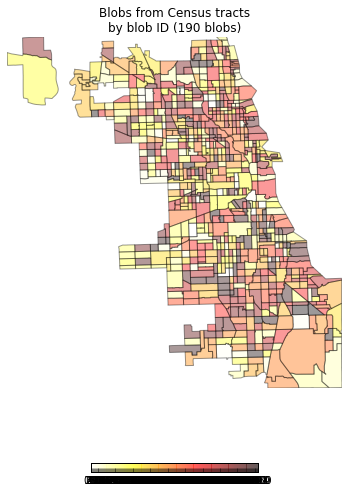

In [9]:
# Create blobs minimum household of 10,000 in each blob. This calls a Pop-Up Window with the Map.
b = blobs.Blobs(d, 'pop', 10000, iterations=1)

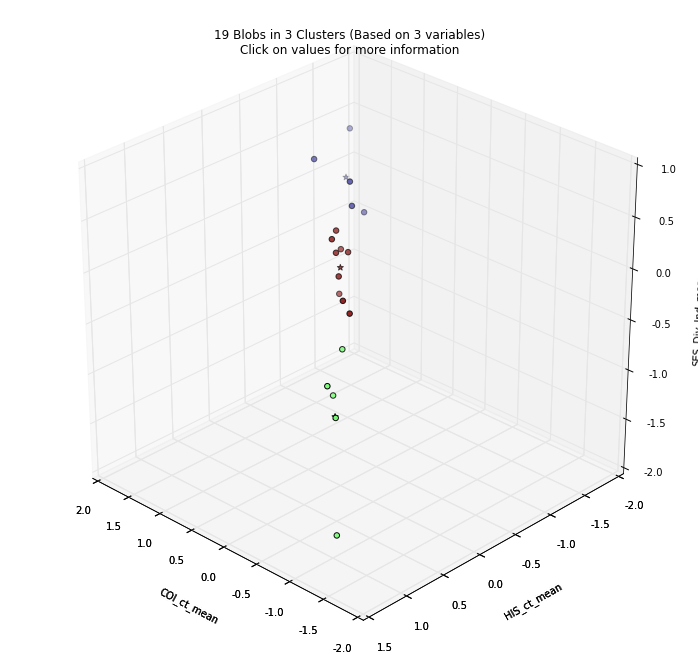

In [12]:
# Cluster the blobs along similarities in the data
cl = blobs.Cluster_blobs(b, blobs_per_cluster=5)

['COI_ct', 'HIS_ct', 'SES_Div_Ind']

### CREATING BLOBS FROM 3 VARIABLES ###
    PARAMETERS:
     # Minimum areas in each blob: 30
     # Iterations: 10
     # Method: equal votes
     # Plot blobs: True
     # Save blobs data: False


# ITERATION 1                 
  Score: 1430.85
  Created 19 blobs (42 tracts per blob)
  Best solution so far: 1430.85
  Time taken: 24.5 seconds (220 seconds remaining)


# ITERATION 2                 
  Score: 1493.55
  Created 20 blobs (40 tracts per blob)
  Best solution so far: 1430.85
  Time taken: 21.2 seconds (183 seconds remaining)


# ITERATION 3                 
  Score: 1483.36
  Created 18 blobs (44 tracts per blob)
  Best solution so far: 1430.85
  Time taken: 21.8 seconds (157 seconds remaining)


# ITERATION 4                 
  Score: 1494.73
  Created 21 blobs (38 tracts per blob)
  Best solution so far: 1430.85
  Time taken: 15.6 seconds (124 seconds remaining)


# ITERATION 5                 
  Score: 1495.09
  Created 20 blobs (40 t

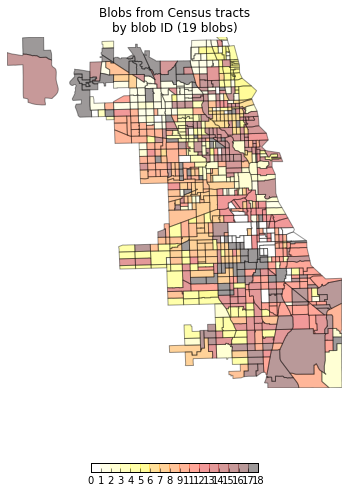

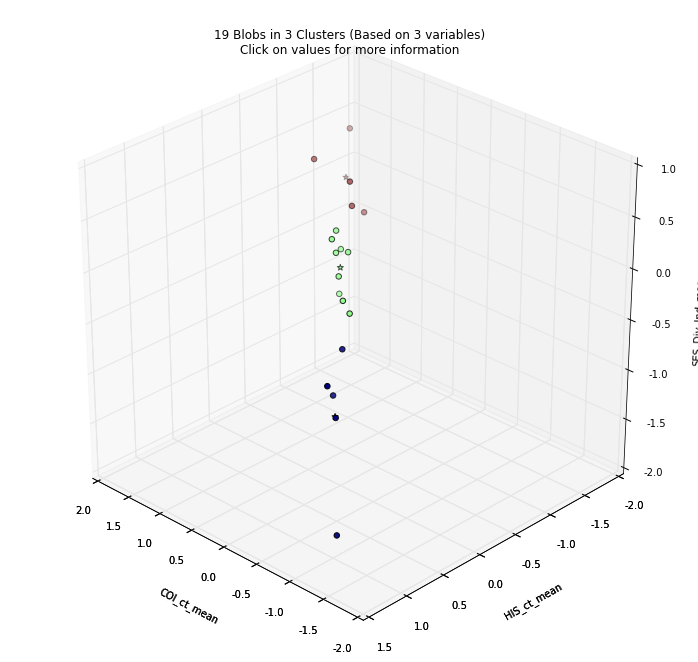

In [11]:
# Create blobs with a minimum of 30 tracts in each blob, and cluster
b = blobs.Blobs(d, 'areas', 30)
cl = blobs.Cluster_blobs(b, blobs_per_cluster=5)

In [13]:
# Have around 3 blobs per cluster
cl.set_n_clusters(3)

In [14]:
# See blob assignments
cl.assignments

array([1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2, 2, 2, 0, 0, 1, 0, 1], dtype=int32)

  Plotting...

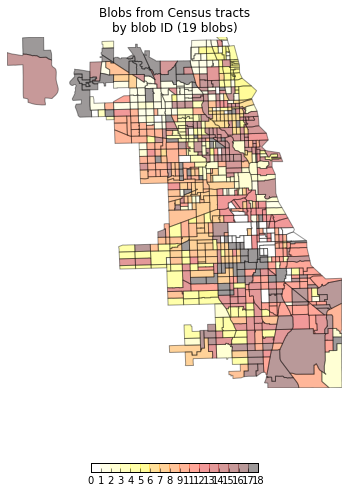

In [15]:
# Plot blobs along one of the variables
b.plot_blobs()